In [1]:
import duckdb
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import time

In [2]:
PARQUET_PATH = '/home/anjah/Documents/mag/BD/project/BD_project/data/augmented/augmented'
DUCKDB_PATH = '/eda_DuckDB'

### EDA

In [3]:
 # Create a DuckDB connection
conn = duckdb.connect("nyc_database")
# load the parquet files into conn
conn.execute(f"""
CREATE TABLE nyc_data AS 
SELECT * FROM parquet_scan('{PARQUET_PATH}/*.parquet', union_by_name = TRUE)
""")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [7]:
conn = duckdb.connect("nyc_database")

IOException: IO Error: Could not set lock on file "/home/anjah/Documents/mag/BD/project/BD_project/eda_DuckDB/nyc_database": Conflicting lock is held in /home/anjah/miniconda3/envs/BDproj/bin/python3.9 (PID 19550) by user anjah. See also https://duckdb.org/docs/connect/concurrency

1724015362.8385403
0.41063642501831055


/tmp/ipykernel_7787/1953455325.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_state_counts, x='Registration State', y='count', palette='viridis')


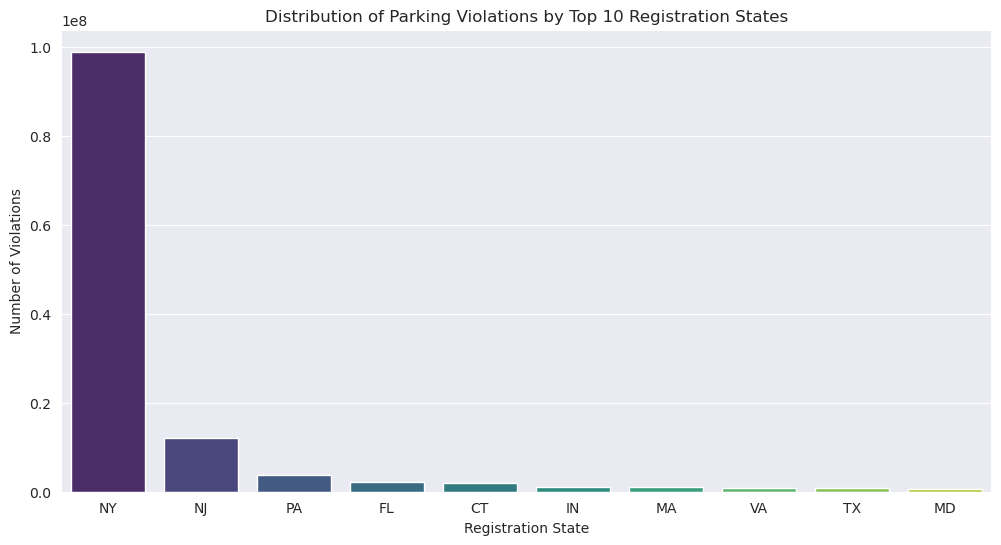

In [4]:
# Directly query the counts of each registration state
count_query = f"""
SELECT "Registration State", COUNT(*) AS count
FROM nyc_data

GROUP BY "Registration State"
ORDER BY count DESC
LIMIT 10
"""

# Execute the query and fetch the result into a DataFrame
start = time.time()
print(start)
df_state_counts = conn.execute(count_query).df()
print(time.time()-start)

# Plot the distribution of the top 10 registration states
plt.figure(figsize=(12, 6))
sns.barplot(data=df_state_counts, x='Registration State', y='count', palette='viridis')
plt.title('Distribution of Parking Violations by Top 10 Registration States')
plt.xlabel('Registration State')
plt.ylabel('Number of Violations')
plt.show()

In [9]:
df_state_counts

,Registration State,count
0,NY,98986174
1,NJ,12042909
2,PA,3753575
3,FL,2163114
4,CT,1927283
5,IN,1143977
6,MA,1005815
7,VA,883711
8,TX,770027
9,MD,719935


In [5]:
# Query to get the number of tickets issued per day
tickets_per_day_query = """
SELECT "Issue Date" as date, COUNT("Summons Number") as ticket_count, AVG("PRCP") as precipitation
FROM nyc_data
GROUP BY "Issue Date"
ORDER BY "Issue Date"
"""

# Execute the query and fetch the result into a DataFrame
start = time.time()
print(start)
df_tickets_per_day = conn.execute(tickets_per_day_query).df()
end = time.time()
print(end-start)
#drop duplictaes
df_tickets_per_day = df_tickets_per_day.drop_duplicates(subset=['date'])

1724015417.4576445
0.4151575565338135


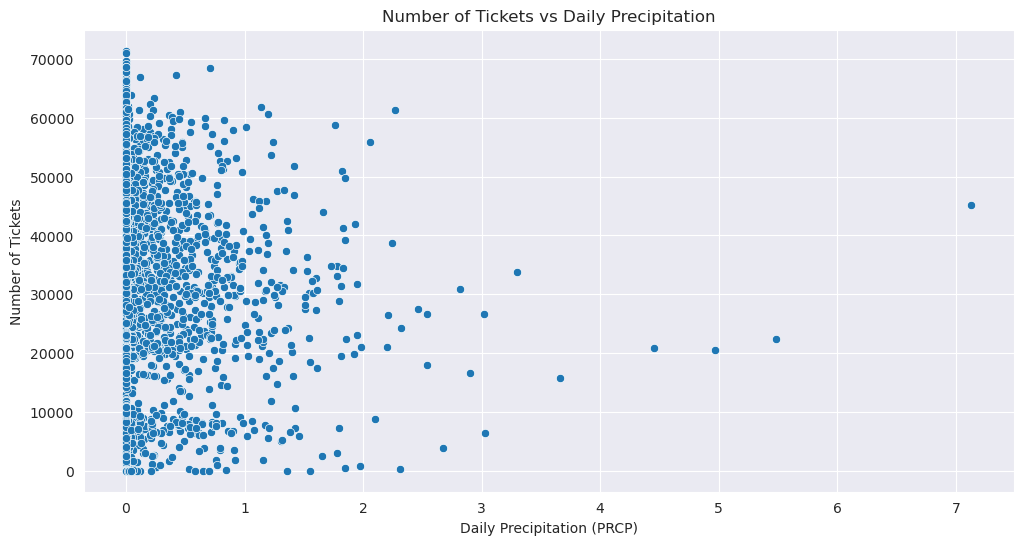

In [6]:
# Plotting the number of tickets vs precipitation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_tickets_per_day, x='precipitation', y='ticket_count')
plt.title('Number of Tickets vs Daily Precipitation')
plt.xlabel('Daily Precipitation (PRCP)')
plt.ylabel('Number of Tickets')
plt.show()
